In [24]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##

# 2.7 linear algebra

In [25]:
# https://www.tensorflow.org/api_docs/python/tf/linalg
# Operations for linear algebra.

import tensorflow as tf
#1 L2 norm (유클리디언 거리)
# https://www.tensorflow.org/api_docs/python/tf/norm

a = tf.constant([1, 2], dtype=tf.float32)
print('a', a)
print('tf.norm(a)', tf.norm(a)) # tf.linalg.norm(a)

#2 transpose
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
print('A', A)
print('tf.linalg.matrix_transpose(A)', tf.linalg.matrix_transpose(A))

#3 determinant
print('tf.linalg.det(A)', tf.linalg.det(A))

#4 inverse matrix
B =  tf.linalg.inv(A)
print('B', B)

#5 matrix multiplication
print('tf.matmul(A, B)', tf.matmul(A, B))  # tf.linalg.matmul(A, B)


a tf.Tensor([1. 2.], shape=(2,), dtype=float32)
tf.norm(a) tf.Tensor(2.236068, shape=(), dtype=float32)
A tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.linalg.matrix_transpose(A) tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
tf.linalg.det(A) tf.Tensor(-2.0, shape=(), dtype=float32)
B tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)
tf.matmul(A, B) tf.Tensor(
[[ 1.0000000e+00  0.0000000e+00]
 [-4.7683716e-07  1.0000002e+00]], shape=(2, 2), dtype=float32)


**matrix equation**

Ax = b

==> x = A<sup>-1</sup> x b

A<sup>-1</sup> = $\frac{1}{DET(A)}$ A

In [26]:
#1 Ax = b
A = tf.constant([[1, 2],
                 [3, -5]], dtype=tf.float32)

b = tf.constant([[4],
                 [1]], dtype=tf.float32)

#2 DET(A)
print(tf.linalg.det(A))

def solve(A, b):
  # x = A^-1 x b
  x1 = tf.matmul(tf.linalg.inv(A), b)
  print('x1', x1)

  # https://www.tensorflow.org/api_docs/python/tf/linalg/solve
  # Solves systems of linear equations.
  x2 = tf.linalg.solve(A, b)  # x = 2, y = 1
  print(x1, x2)

  return x1, x2

print(solve(A, b))

tf.Tensor(-11.000001, shape=(), dtype=float32)
x1 tf.Tensor(
[[2.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[2.]
 [1.]], shape=(2, 1), dtype=float32) tf.Tensor(
[[2.]
 [1.]], shape=(2, 1), dtype=float32)
(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [1.]], dtype=float32)>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [1.]], dtype=float32)>)


**LU decomposition**

A = LU 로 분해하여

Ax = b 를 푸는 과정에 활용해 보면,

=> LUx = b

=> Ux = Z  로 놓고

=> LZ = b  를 풀고

=> Ux = z 를 풀면

x 를 구할 수 있음
(역행렬 방법과 비교하여 빠르고, 메모리 적게 사용해서 계산 가능)

In [27]:
A = tf.constant([[1, 2],
                 [3, -5]], dtype=tf.float32)

b = tf.constant([[4],
                 [1]], dtype=tf.float32)

# https://www.tensorflow.org/api_docs/python/tf/linalg/lu
# Computes the LU decomposition of one or more square matrices.

lu, p = tf.linalg.lu(A)
print('tf.linalg.lu(A)', lu, p)

x = tf.linalg.lu_solve(lu, p, b)
print('x', x)

# L = tf.linalg.band_part(lu,-1,0) - tf.linalg.diag(tf.linalg.diag_part(lu)) + tf.linalg.diag(tf.ones(shape = lu.shape[0],))
# U = tf.linalg.band_part(lu, 0, -1)
# permu_operator = tf.linalg.LinearOperatorPermutation(p)
# P = permu_operator.to_dense()

# print('L', L)
# print('U', U)

# AA = tf.matmul(P, tf.matmul(L,U), transpose_a = True)
# print('AA', AA)

# AAA = tf.linalg.lu_reconstruct(lu, p)
# print('AAA', AAA)

tf.linalg.lu(A) tf.Tensor(
[[ 3.         -5.        ]
 [ 0.33333334  3.6666667 ]], shape=(2, 2), dtype=float32) tf.Tensor([1 0], shape=(2,), dtype=int32)
x tf.Tensor(
[[2.]
 [1.]], shape=(2, 1), dtype=float32)


**least squares**

(0, 6), (1, 0), (2, 0) 을 지나는 가장 가까운 직선의 방정식은?

6 = a x 0 + b

0 = a x 1 + b

0 = a x 2 + b

위 수식을 모두 만족하는 a 는 존재하는가?

=> 존재하지 않으면 **차이가 최소(에러가 최소)**가 되는 근사값 $\hat{a}$ 을 구해보자!

Error<sup>2</sup> = (6 - (a x 0 + b))<sup>2</sup> + (0 - (a x 1 + b))<sup>2</sup> + (0 - (a x 2 + b))<sup>2</sup>

=> 행렬로 풀려면 공식 이용

$X = \begin{bmatrix}\hat{a}\\
\hat{b}
\end{bmatrix}$

(A<sup>T</sup>A)X = A<sup>T</sup>b

(참고: https://en.wikipedia.org/wiki/Linear_least_squares)


=> 2차 방정식이므로 $\hat{a}$ 과 $\hat{b}$ 에 대해 미분하자!


# 2.8 gradient decent

수학에서 경사 하강법은 미분 가능 함수의 로컬 최소값을 찾기 위한 1차 반복 최적화 알고리즘입니다.

알고리즘: 현재 지점에서 함수의 기울기의 반대 방향(빼줌)으로 반복되는 단계를 수행하는 것이며, 그 결과로 local minimum을 찾을 수 있습니다.

$x = x - lr * dx$


[gradient decent](https://en.wikipedia.org/wiki/Gradient_descent)


<img src="https://drive.google.com/uc?id=1H77kMZ1UhsB3N7HRXJ77StzJzTyXodf0" width="400"/>

[Animation](https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a)



예)

<img src="https://drive.google.com/uc?id=1vcxLliVPoM6Lw6HfFEQAFiXDf3J0CjL_" width="200"/>


$ F = (x-1)^2$

=> $x^2 -2x + 1$

[2차 함수](https://www.geogebra.org/m/xgdQkfk3)



Text(0, 0.5, '$y=x^2-2x+1$')

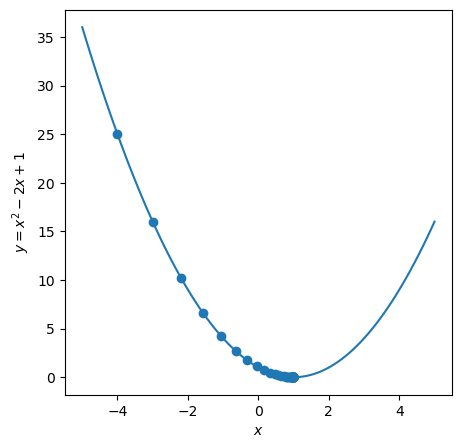

In [28]:
def f(x):
  return x**2 - 2*x + 1

def f_prime(x):
  h = 0.01
  return (f(x+h)-f(x)) / h

def f_prime2(x):
  return 2*x - 2

all_x = tf.linspace(-5,5,100)
all_y = f(all_x)

x = tf.Variable(-4.) # initial value
LR = 0.1

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*f_prime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.xlabel('$x$')
plt.ylabel('$y=x^2-2x+1$')

# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

Chapter03 회귀(Regression)

05 평균 제곱 오차 손실함수

06 넘파이 단순 선형 회귀

07 자동 미분 계산

08 텐서플로 단순 선형 회귀

09 다변수 선형 회귀

10 tf.keras.optimizers를 이용한 학습

11 다항식 회귀


# ch3. regression

통계에서 선형 회귀는 스칼라 응답(e.g.,키)와 하나 이상의 설명 변수(e.g.,몸무게) 간의 관계를 모델링하기 위한 선형 접근 방식입니다.

주로 어떤 값을 예측하기 위해 많이 사용합니다.

예를 들어, 100명의 키와 몸무게 데이터가 엑셀과 같이 row, column의 테이블 데이터 형식으로 주어질 때, 몸무게를 입력하면 키를 예측하거나 그 반대의 경우를 예측하는 경우에 사용할 수 있습니다.

* simple linear regression: 몸무게 하나로 키를 예측할 때
* multiple linear regression: 몸무게와 나이로 키를 예측할 때

[선형회귀](https://en.wikipedia.org/wiki/Linear_regression)



In [29]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 3.1 mean squared error



$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$

**왜 MSE 인가?**

* 1차원이면

> 미분이 안되거나, loss 의 합이 0인 경우에 잘못된 결과를 도출할 수 있음

* 3 차원 이상이면

> overfit 될 수 있고, 여러 개의 local optimal points 존재할 수 있음




In [30]:
def MSE(y, t):
  return tf.reduce_mean(tf.square(y - t))   # (y - t)**2

# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError
# Computes the mean of squares of errors between labels and predictions.
tf_MSE = tf.keras.losses.MeanSquaredError()

t = tf.constant([1, 2, 3, 4], dtype=tf.float32)

y1 = tf.constant([0.5, 1, 1.5, 2])
y2 = tf.constant([0.5, 1.5, 2.5, 3.5])

print("MSE(t, y1)", MSE(t, y1))
print("MSE(t, y2)", MSE(t, y2))

print("tf_MSE(t, y1)", tf_MSE(t, y1))
print("tf_MSE(t, y2)", tf_MSE(t, y2))

MSE(t, y1) tf.Tensor(1.875, shape=(), dtype=float32)
MSE(t, y2) tf.Tensor(0.25, shape=(), dtype=float32)
tf_MSE(t, y1) tf.Tensor(1.875, shape=(), dtype=float32)
tf_MSE(t, y2) tf.Tensor(0.25, shape=(), dtype=float32)


# 3.2 automatic differentiation

* 자동으로 미분하기 위해 forward pass 동안 어떤 연산이 어떤 순서로 발생하는지 기억해야 함

* 그런 다음 backward pass 중에 gradient 를 계산하기 위해 이 연산 목록을 역순으로 순회함

* 이를 위해 tf.GradientTape 을 사용함

[자동미분](https://www.tensorflow.org/guide/autodiff)

In [31]:
x = tf.Variable(2.0) # tf.Variable(2.0, trainable=True)
y = tf.Variable(3.0) # tf.Variable(3.0, trainable=True)

# https://www.tensorflow.org/api_docs/python/tf/GradientTape
# Record operations for automatic differentiation.

with tf.GradientTape() as tape:
    z = x**2 + y**2

# dx = 2x -> 4
# dy = 2y -> 6
dx, dy = tape.gradient(z, [x, y])
print('dx=', dx.numpy())
print('dy=', dy.numpy())

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

# dy = 2x * dx => 6
dy_dx = tape.gradient(y, x)
print('dy_dx.numpy()', dy_dx.numpy())

dx= 4.0
dy= 6.0
dy_dx.numpy() 6.0


In [32]:
# multiple variables
W = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  # Since python >= 3.5 the @ operator is supported (see PEP 465).
  # In TensorFlow, it simply calls the tf.matmul() function
  y = x @ W + b
  loss = tf.reduce_mean(y**2)

[dl_dW, dl_db] = tape.gradient(loss, [W, b])

print('W', W)
print('b', b)
print('dl_dw', dl_dW)
print('dl_db', dl_db)

my_vars = {
    'W': W,
    'b': b
}

grad = tape.gradient(loss, my_vars)
print('grad[W]', grad['W'])
print('grad[b]', grad['b'])

W <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.9838684 , -1.122517  ],
       [-0.8951111 ,  1.1268106 ],
       [ 0.6870242 , -0.86512494]], dtype=float32)>
b <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
dl_dw tf.Tensor(
[[ 1.2547188 -1.4642707]
 [ 2.5094376 -2.9285414]
 [ 3.7641563 -4.3928123]], shape=(3, 2), dtype=float32)
dl_db tf.Tensor([ 1.2547188 -1.4642707], shape=(2,), dtype=float32)
grad[W] tf.Tensor(
[[ 1.2547188 -1.4642707]
 [ 2.5094376 -2.9285414]
 [ 3.7641563 -4.3928123]], shape=(3, 2), dtype=float32)
grad[b] tf.Tensor([ 1.2547188 -1.4642707], shape=(2,), dtype=float32)


# 3.3 MSE with SGD

gradient descent 는 계산량이 많아 데이터가 많으면 느리다 (보통 GPU 메모리가 부족함 ㅠㅠ)

* f 의 도함수를 구한 후 관찰값의 개수만큼 모두 계산함 (예 1,000개의 센서 데이터)
* $x_{1}, x_{2}, x_{3}...$ 등으로 n 개의 features 로 f 값을 계산 시 n개 각각 계산해야 함
* epochs이 100 번이라면, 1000 * n * 100 미분

반면에, Stochastic Gradient Descent 는

* **실제 기울기(전체 데이터 세트에서 계산)를 추정치(데이터 세트에서 임의로 하나 선택하여 계산)로 대체하여 근사함**

* 고차원 최적화 문제에서 계산 부담을 줄여줌

* but, zig-zag 패턴 및 수렴 속도가 엄청(?) 느려질 수 있고, 하나 고른 데이터가 outlier 일 경우에 영향을 많이 받을 수 있음

* mini-batch 전략으로 보완함

[확률적 경사 하강법](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

<br>

| Stochastic | Batch |
| ----------- | ----------- |
| <img src="https://www.mltut.com/wp-content/uploads/2020/04/Untitled-document-5.png"> | <img src="https://www.mltut.com/wp-content/uploads/2020/04/Untitled-document-4.png"> |

<br>


<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/48_blog_image_2.png">


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kbP1fkMFrcjwBO3NVP9OfQ.png">













x tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
t tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
w <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.30074456>
b <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.8719833>
epoch=0: w=  0.9253. b=  1.7131, loss=  0.6273
epoch=10: w=  1.0182. b=  0.6455, loss=  0.0956
epoch=20: w=  0.9771. b=  0.2361, loss=  0.0123
epoch=30: w=  1.0053. b=  0.0871, loss=  0.0021
epoch=40: w=  1.0006. b=  0.0316, loss=  0.0002
epoch=50: w=  1.0011. b=  0.0113, loss=  0.0000
epoch=60: w=  0.9998. b=  0.0040, loss=  0.0000
epoch=70: w=  1.0002. b=  0.0015, loss=  0.0000
epoch=80: w=  1.0000. b=  0.0005, loss=  0.0000
epoch=90: w=  1.0000. b=  0.0002, loss=  0.0000
w=  1.0000. b=  0.0001, loss=  0.0000


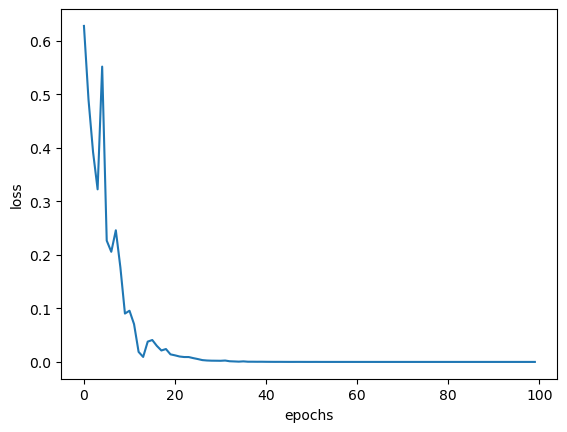

In [33]:
#Mini Batch Gradient Descent
def f(x, w, b):
  return w*x + b

def MSE(y, t):
  return tf.reduce_mean((y-t)**2)

def w_grad_MSE(y, t, w, b):
  return 2*tf.reduce_mean((y-t_batch)*x_batch)

def b_grad_MSE(y, t, w, b):
  return 2*tf.reduce_mean((y-t_batch))

x = tf.range(-10,10, dtype=tf.float32)
t = tf.range(-10,10, dtype=tf.float32)

print('x', x)
print('t', t)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

#w = tf.Variable(0.5)
#b = tf.Variable(0.0)

print('w', w)
print('b', b)

lr = 0.01  # 0.01, learning rate
loss_list = []

train_size = tf.size(t) # 12
batch_size = 4

# mini batch SGD
K = train_size // batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        #print(mask)
        # https://www.tensorflow.org/api_docs/python/tf/gather
        # Gather slices from params axis axis according to indices.
        x_batch = tf.gather(x, indices=mask)
        t_batch = tf.gather(t, indices=mask)

        y_batch = f(x_batch, w, b) #w*x_batch + b
        loss = MSE(y_batch, t_batch) # calculate MSE
        dw = w_grad_MSE(y_batch, t_batch, w, b)
        db = b_grad_MSE(y_batch, t_batch, w, b)
        #dw = 2*tf.reduce_mean((y-t_batch)*x_batch) # gradients
        #db = 2*tf.reduce_mean((y-t_batch))
        #print('dw', dw)
        #print('db', db)
        w.assign_sub(lr*dw)
        b.assign_sub(lr*db)

    loss /= tf.cast(K, dtype=tf.float32)   # average loss
    loss_list.append(loss.numpy())
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

x tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
t tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
w <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.22382407>
b <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09311593>
epoch=0: w=  1.0005. b=  0.0221, loss=  0.0001
epoch=10: w=  1.0007. b=  0.0082, loss=  0.0000
epoch=20: w=  1.0000. b=  0.0030, loss=  0.0000
epoch=30: w=  1.0000. b=  0.0011, loss=  0.0000
epoch=40: w=  1.0000. b=  0.0004, loss=  0.0000
epoch=50: w=  1.0000. b=  0.0001, loss=  0.0000
epoch=60: w=  1.0000. b=  0.0001, loss=  0.0000
epoch=70: w=  1.0000. b=  0.0000, loss=  0.0000
epoch=80: w=  1.0000. b=  0.0000, loss=  0.0000
epoch=90: w=  1.0000. b=  0.0000, loss=  0.0000
w=  1.0000. b=  0.0000, loss=  0.0000


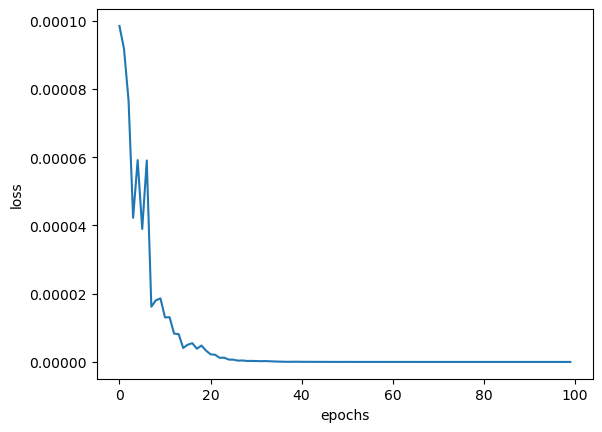

In [34]:
#Mini Batch Gradient Descent
def f(x, w, b):
  return w*x + b

def MSE(y, t):
  return tf.reduce_mean((y-t)**2)

x = tf.range(-10, 10, dtype=tf.float32)
t = tf.range(-10, 10, dtype=tf.float32)

print('x', x)
print('t', t)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

#w = tf.Variable(0.5)
#b = tf.Variable(0.0)

print('w', w)
print('b', b)

lr = 0.01  # 0.01, learning rate
loss_list = []

train_size = tf.size(t) # 12
batch_size = 4

# mini batch SGD
K = train_size // batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        #print(mask)
        # https://www.tensorflow.org/api_docs/python/tf/gather
        # Gather slices from params axis axis according to indices.
        x_batch = tf.gather(x, indices=mask)
        t_batch = tf.gather(t, indices=mask)
        with tf.GradientTape() as tape:
          y_batch = f(x_batch, w, b) #w*x_batch + b
          loss = MSE(y_batch, t_batch) # calculate MSE & loss_mean

        [dw, db] = tape.gradient(loss, [w,b])
        # dW = 2*tf.reduce_mean((y-t_batch)*x_batch) # gradients
        # dB = 2*tf.reduce_mean((y-t_batch))
        #print('dW', dW)
        #print('dB', dB)
        w.assign_sub(lr*dw)
        b.assign_sub(lr*db)

    loss /= tf.cast(K, dtype=tf.float32)   # average loss
    loss_list.append(loss.numpy())
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## 3.3.1 tf.keras optimizers

### SGD: Gradient descent (with momentum) optimizer.

$$\vec{v_{t}} = \rho\cdot\vec{v_{t-1}} - lr\cdot\vec{dw}$$
$$w = w + v_{t}$$

```python
tf.keras.optimizers.SGD(
    learning_rate=0.01,  
    momentum=0.0,        
    ...
)
```
### Adagrad

learning rate 에 지금까지 계산한 gradient 제곱값의 누적합(G)를 나눠서 갱신함

기울기가 급격하게 변화할 때 lr 값이 작아지고, 반대일 때 커진다.

학습을 많이할 수록 learning rate가 점점 작아짐

$$w = w - lr\cdot\frac{1}{\sqrt{G+\epsilon}}\cdot dw$$

```python
tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    epsilon=1e-07,
    ...
)
```

### RMSprop

Adagrad의 G를 구할 때, 직전 단계의 G 누적합에 $\rho$ 값으로 반영 비율을 조절함

$$G_{t}\prime = \rho \cdot G_{t-1} + (1-\rho)\cdot (dw_{t})^2$$

$$w = w - lr\cdot\frac{1}{\sqrt{G\prime+\epsilon}}\cdot dw$$

```python
tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    ...
)
```

### Adam

RMSprop 방법에 momentum 을 추가한 방법임

현재 가장 널리 사용되고 있는 최적화 알고리즘

```python
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    ...
)

```

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif">

<img src="https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif">

[멋진 설명(33-50p)](https://www.slideshare.net/yongho/ss-79607172) - Kakao 하용호님

<img src="https://user-images.githubusercontent.com/45377884/91630397-18838100-ea0c-11ea-8f90-515ef74599f1.png">



[Animation 참조](https://github.com/ilguyi/optimizers.numpy)


epoch=0: w=  1.6000. b=  2.4000, loss= 13.0000
epoch=10: w=  0.1718. b=  0.2577, loss=  0.1499
epoch=20: w=  0.0184. b=  0.0277, loss=  0.0017
epoch=30: w=  0.0020. b=  0.0030, loss=  0.0000
epoch=40: w=  0.0002. b=  0.0003, loss=  0.0000
epoch=50: w=  0.0000. b=  0.0000, loss=  0.0000
epoch=60: w=  0.0000. b=  0.0000, loss=  0.0000
epoch=70: w=  0.0000. b=  0.0000, loss=  0.0000
epoch=80: w=  0.0000. b=  0.0000, loss=  0.0000
epoch=90: w=  0.0000. b=  0.0000, loss=  0.0000
w=  0.0000. b=  0.0000, loss=  0.0000


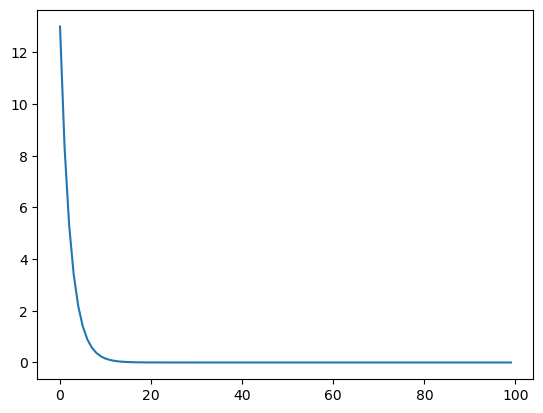

In [35]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD
# Gradient descent (with momentum) optimizer.
opt = tf.keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.001
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

loss_list = [ ]
for epoch in range(100):
  with tf.GradientTape() as tape:
    loss = x**2 + y**2
  loss_list.append(loss.numpy())
  #if loss < 0.001: break
  dx, dy = tape.gradient(loss, [x, y])
  grads_and_vars = zip([dx, dy], [x, y])
  opt.apply_gradients(grads_and_vars)

  if not epoch%10:
    print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, x.numpy(), y.numpy(), loss.numpy()))


print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(x.numpy(), y.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

epoch=0: w=  0.9107. b=  0.0315, loss= 14.0288
epoch=10: w=  0.9974. b=  0.0370, loss=  0.0006
epoch=20: w=  0.9972. b=  0.0361, loss=  0.0005
epoch=30: w=  0.9970. b=  0.0354, loss=  0.0003
epoch=40: w=  0.9976. b=  0.0345, loss=  0.0004
epoch=50: w=  0.9973. b=  0.0336, loss=  0.0003
epoch=60: w=  0.9976. b=  0.0326, loss=  0.0002
epoch=70: w=  0.9978. b=  0.0318, loss=  0.0003
epoch=80: w=  0.9976. b=  0.0309, loss=  0.0002
epoch=90: w=  0.9978. b=  0.0301, loss=  0.0002
w=  0.9976. b=  0.0292, loss=  0.0002


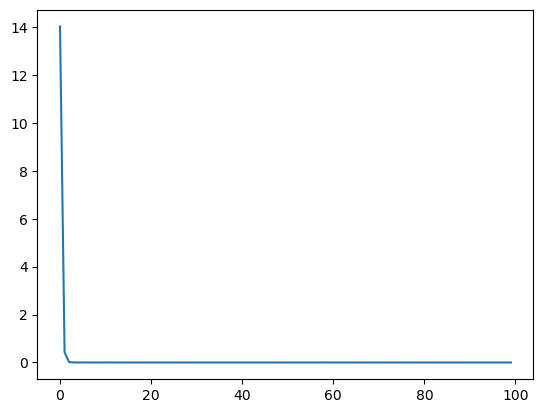

In [36]:
# def MSE(y, t):
#     return tf.reduce_mean((y-t)**2)

tf_MSE = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

x = tf.range(20, dtype=tf.float32)
t = tf.range(20, dtype=tf.float32)

w = tf.Variable(0.5)
b = tf.Variable(0.0)

lr = 0.001  # 0.01, learning rate
loss_list = []

train_size = tf.size(t) # 12
batch_size = 4

# mini batch SGD
K = train_size // batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        #print(mask)
        x_batch = tf.gather(x, indices=mask)
        t_batch = tf.gather(t, indices=mask)
        with tf.GradientTape() as tape:
          y = w*x_batch + b                          # calculate the output
          loss += tf_MSE(y, t_batch) # calculate MSE
        optimizer.minimize(loss, [w, b], tape=tape)
        #dW = 2*tf.reduce_mean((y-t_batch)*x_batch) # gradients
        #dB = 2*tf.reduce_mean((y-t_batch))
        #print('dW', dW)
        #print('dB', dB)
        #w.assign_sub(lr*dW)
        #b.assign_sub(lr*dB)

    loss /= tf.cast(K, dtype=tf.float32)   # average loss
    loss_list.append(loss.numpy())
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

# 3.4 simple linear regression

In [37]:
# https://www.tensorflow.org/tutorials/keras/regression
# Predict fuel efficiency with the Auto MPG dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
MPG_dataset = raw_dataset.copy()
MPG_dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [38]:
print(MPG_dataset.isna().sum())
MPG_dataset = MPG_dataset.dropna()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


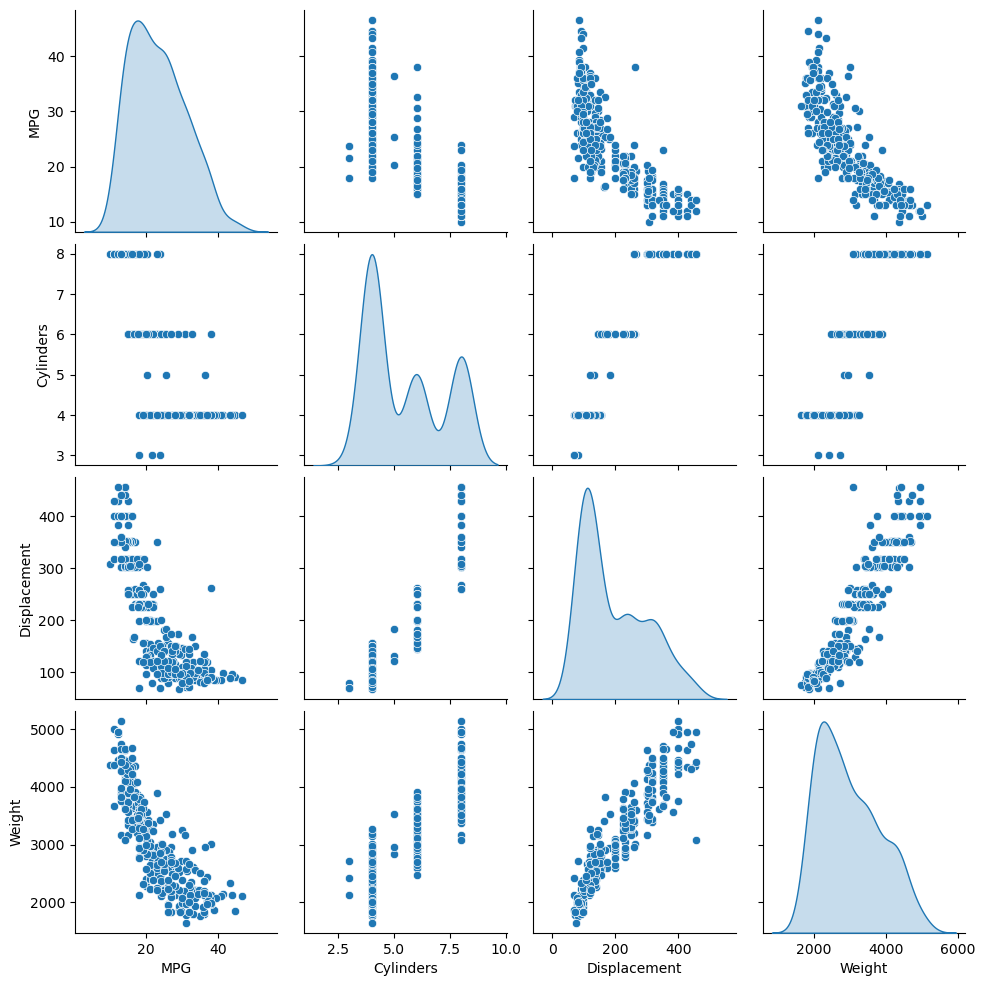

In [39]:
import seaborn as sns

train_dataset = MPG_dataset.sample(frac=0.8, random_state=0)
test_dataset = MPG_dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [40]:
train_dataset.corr() # miles per gallon

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.770246,-0.800383,-0.764545,-0.819802,0.395955,0.574117,0.569716
Cylinders,-0.770246,1.000000,0.946806,0.844247,0.893869,-0.506000,-0.338375,-0.560802
Displacement,-0.800383,0.946806,1.000000,0.902151,0.929876,-0.545912,-0.363671,-0.613082
Horsepower,-0.764545,0.844247,0.902151,1.000000,0.857417,-0.699720,-0.394927,-0.449111
Weight,-0.819802,0.893869,0.929876,0.857417,1.000000,-0.412728,-0.284673,-0.579281
Acceleration,0.395955,-0.506000,-0.545912,-0.699720,-0.412728,1.000000,0.276164,0.212413
Model Year,0.574117,-0.338375,-0.363671,-0.394927,-0.284673,0.276164,1.000000,0.190277
Origin,0.569716,-0.560802,-0.613082,-0.449111,-0.579281,0.212413,0.190277,1.000000


In [41]:
def load_MPG_train_dataset(columns):
  x = train_dataset[columns].to_numpy()
  y = train_dataset[['MPG']].to_numpy()
  return (x, y)

def load_MPG_test_dataset(columns):
  x = test_dataset[columns].to_numpy()
  y = test_dataset[['MPG']].to_numpy()
  return (x, y)

In [21]:
# gradient descent
x, y = load_MPG_train_dataset(['Horsepower'])

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

loss_list = []

tf_MSE = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

for epoch in range(100):
  with tf.GradientTape() as tape:
    y_hat = w * x + b
    loss = tf_MSE(y_hat, y)

  dw, db = tape.gradient(loss, [w, b])
  opt.apply_gradients([[dw, w], [db, b]])
  loss_list.append(loss.numpy())

  if not epoch%10:
    print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

KeyError: 'The optimizer cannot recognize variable Variable:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.SGD.'

In [22]:
# mini-batch gradient descent
x, y = load_MPG_train_dataset(['Horsepower'])
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

loss_list = []

tf_MSE = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

for epoch in range(100):
  dataset_train = dataset.shuffle(buffer_size=1024).batch(batch_size)
  for step, (x_batch, y_batch) in enumerate(dataset_train):
    #print('step', step)
    #print('x_batch', x_batch.shape)
    #print('y_batch', y_batch.shape)
    with tf.GradientTape() as tape:
      y_hat = w * x + b
      loss = tf_MSE(y_hat, y)

    dw, db = tape.gradient(loss, [w, b])
    opt.apply_gradients([[dw, w], [db, b]])
    loss/=batch_size
    loss_list.append(loss.numpy())

  if not epoch%10:
    print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>8.4f}. b={:>8.4f}, loss={:>8.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(loss_list)
axs[0].set(xlabel="epochs", ylabel="loss")

axs[1].scatter(x, y)
axs[1].plot(x, w*x+b, color='g')
axs[1].set(xlabel="Horsepower", ylabel="MPG")

x, y = load_MPG_test_dataset(['Horsepower'])
axs[2].scatter(x, y)
axs[2].plot(x, w*x+b, color='r')
axs[2].set(xlabel="Horsepower", ylabel="MPG")
print("loss={:>8.4f}".format(tf_MSE(w*x+b, y)))



KeyError: 'The optimizer cannot recognize variable Variable:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.SGD.'

# 3.5 multiple linear regression

In [42]:
# mini-batch gradient descent
x, y = load_MPG_train_dataset(column_names[1:])
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
w = tf.Variable(tf.random.normal(shape=(x.shape[1],1)))
b = tf.Variable(tf.random.normal([]))

loss_list = []

tf_MSE = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

for epoch in range(100):
  dataset_train = dataset.shuffle(buffer_size=1024).batch(batch_size)
  for step, (x_batch, y_batch) in enumerate(dataset_train):
    #print('step', step)
    #print('x_batch', x_batch.shape)
    #print('y_batch', y_batch.shape)
    with tf.GradientTape() as tape:
      y_hat = x @ w + b
      loss = tf_MSE(y_hat, y)

    dw, db = tape.gradient(loss, [w, b])
    opt.apply_gradients([[dw, w], [db, b]])
    loss/=batch_size
    loss_list.append(loss.numpy())

  if not epoch%10:
    print("epoch={}: loss={:>8.4f}".format(epoch, loss.numpy()))

print("loss={:>8.4f}".format(loss.numpy()))

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(loss_list)
ax.set(xlabel="epochs", ylabel="loss")

#axs[1].scatter(x, y)
#axs[1].plot(x, w*x+b, color='g')
#axs[1].set(xlabel="Horsepower", ylabel="MPG")

x, y = load_MPG_test_dataset(column_names[1:])
#axs[2].scatter(x, y)
#axs[2].plot(x, w*x+b, color='r')
#axs[2].set(xlabel="Horsepower", ylabel="MPG")
print("loss={:>8.4f}".format(tf.reduce_mean(tf_MSE(x@w+b, y))))

KeyError: 'The optimizer cannot recognize variable Variable:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.SGD.'

# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/